CSV loaded successfully!
Dataset shape: (768, 9)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies            

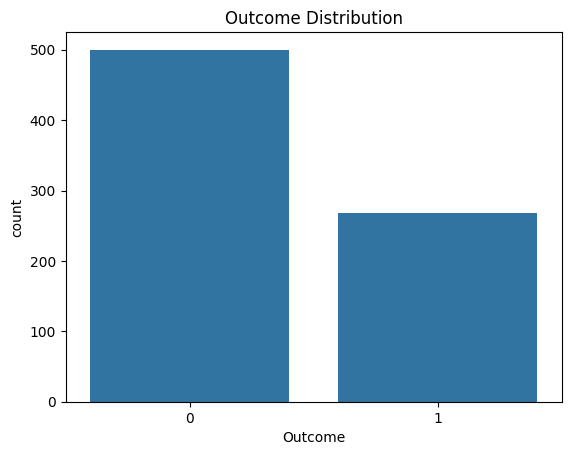

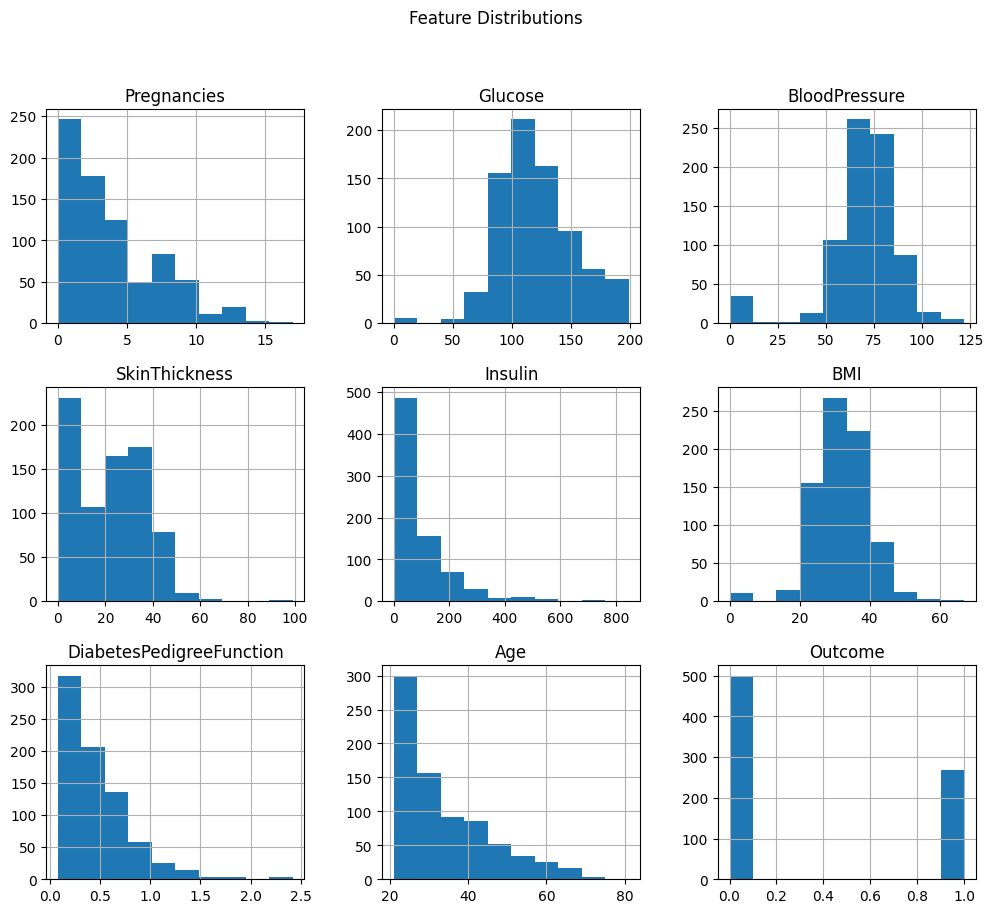

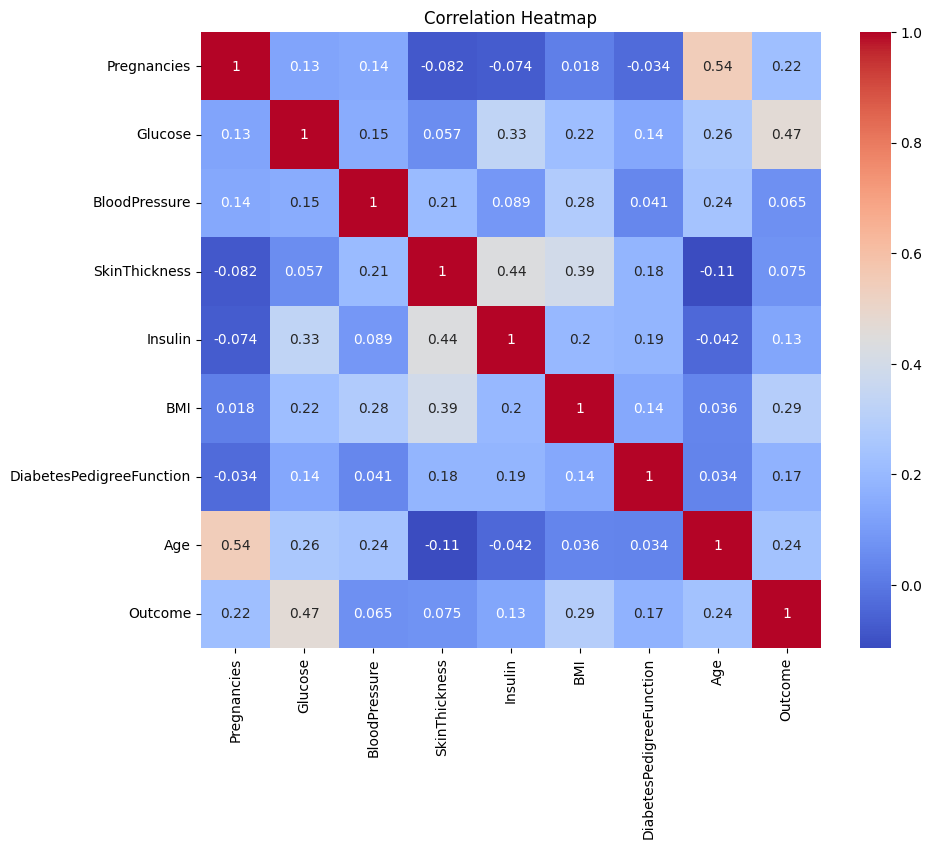

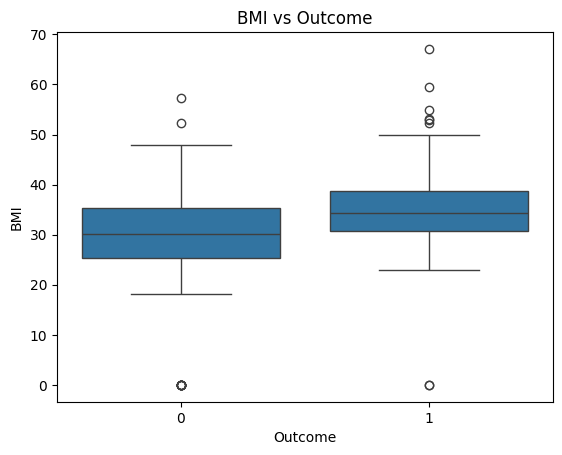

Model trained successfully!
Model saved successfully at: C:\Users\ksano\Desktop\Diabetes_Project\diabetes_logistic_model.pkl

Confusion Matrix:
 [[82 17]
 [19 36]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        99
           1       0.68      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.77       154

ROC-AUC Score: 0.8196510560146923


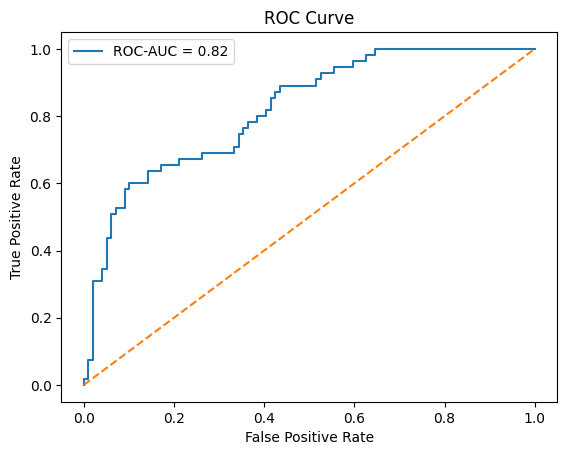

In [19]:
# --- FULL LOGISTIC REGRESSION WITH EDA, PREPROCESSING & MODEL SAVING ---

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import pickle

# ------------------------------------
# 1. FILE PATHS
# ------------------------------------
csv_path = r"C:\Users\ksano\Downloads\diabetes (1).csv"


# Create folder if it doesn't exist
os.makedirs(os.path.dirname(model_path), exist_ok=True)

# ------------------------------------
# 2. LOAD DATA
# ------------------------------------
if not os.path.exists(csv_path):
    raise FileNotFoundError(f"CSV file not found! Check the path: {csv_path}")

df = pd.read_csv(csv_path)
print("CSV loaded successfully!")
print("Dataset shape:", df.shape)
print(df.head())

# ------------------------------------
# 3. DATA UNDERSTANDING
# ------------------------------------
print("\nData Info:")
df.info()

print("\nMissing Values:")
print(df.isnull().sum())

print("\nStatistical Summary:")
print(df.describe())

# ------------------------------------
# 4. EXPLORATORY DATA ANALYSIS (EDA)
# ------------------------------------
plt.figure()
sns.countplot(x='Outcome', data=df)
plt.title("Outcome Distribution")
plt.show()

df.hist(figsize=(12,10))
plt.suptitle("Feature Distributions")
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

plt.figure()
sns.boxplot(x='Outcome', y='BMI', data=df)
plt.title("BMI vs Outcome")
plt.show()

# ------------------------------------
# 5. DATA PREPROCESSING
# ------------------------------------
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_with_zero:
    df[col] = df[col].replace(0, df[col].median())

# Features and target
X = df.drop('Outcome', axis=1)
Y = df['Outcome']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, Y, test_size=0.2, random_state=42
)

# ------------------------------------
# 6. TRAIN LOGISTIC REGRESSION MODEL
# ------------------------------------
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
print("Model trained successfully!")

# ------------------------------------
# 7. SAVE MODEL AS .pkl
# ------------------------------------
with open(model_path, "wb") as f:
    pickle.dump(model, f)

print(f"Model saved successfully at: {model_path}")

# ------------------------------------
# 8. LOAD MODEL & EVALUATE
# ------------------------------------
with open(model_path, "rb") as f:
    loaded_model = pickle.load(f)

# Predictions
y_pred_prob = loaded_model.predict_proba(X_test)[:,1]
y_pred = (y_pred_prob >= 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC-AUC Score
roc_score = roc_auc_score(y_test, y_pred_prob)
print("ROC-AUC Score:", roc_score)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC-AUC = {roc_score:.2f}')
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [20]:
import pickle

with open("diabetes_logistic_model.pkl", "wb") as file:
    pickle.dump(logit_model, file)

print("Model saved successfully!")


Model saved successfully!
